In [69]:
import scrapy

In [70]:
from scrapy.crawler import CrawlerProcess

In [3]:
import logging

class linksSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'https://healthyceleb.com/category/statistics/sports-stars/male-sports-stars/page/%s' % page for page in range(1,7)
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'FEED_FORMAT': 'csv',
        'FEED_URI': 'male.csv'
    }
    
    def parse(self, response):
        for link in response.css('div.td-module-thumb a::attr(href)'):
            list_a = response.urljoin(link.extract())
            yield scrapy.Request(list_a, callback = self.parse_dir_contents)
            
    def parse_dir_contents(self, response):
        for sel in response.xpath('//*[@class="tablepress tablepress-id-3"]'):
            yield {
                'Id':response.url.split("/")[-1],
                'name' : sel.xpath('//thead//tr[1]//th[1]//text()').extract_first(),
                'Gender':'male',
                'height': sel.xpath('//tbody//tr[1]//td[2]//text()').extract_first(),
                'weight': sel.xpath('//tbody//tr[2]//td[2]//text()').extract_first(),
                'URL':response.url
            }     

In [75]:
import logging

class linksSpiderFemale(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'https://healthyceleb.com/category/statistics/sports-stars/female-sports-stars/page/%s' % page for page in range(1,8)
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'FEED_FORMAT': 'csv',
        'FEED_URI': 'female2.csv'
    }
    
    def parse(self, response):
        for link in response.css('div.td-module-thumb a::attr(href)'):
            list_a = response.urljoin(link.extract())
            yield scrapy.Request(list_a, callback = self.parse_dir_contents)
            
    def parse_dir_contents(self, response):
        if not response.xpath('//*[@class="tablepress tablepress-id-3"]'):
            for sel in response.xpath('//*[@class="tablepress tablepress-id-3"]'):
                yield {
                'Id':response.url.split("/")[-1],
                'name' : sel.xpath('//thead//tr[1]//th[1]//text()').extract_first(),
                'Gender':'female',
                'height': sel.xpath('//tbody//tr[1]//td[2]//text()').extract_first(),
                'weight': sel.xpath('//tbody//tr[2]//td[2]//text()').extract_first(),
                'URL':response.url
            }     
        else:
            for sel in response.xpath('//div[@class="td-post-content"]'):
                yield {
                'Id':response.url.split("/")[-1],
                'name' : sel.xpath('//h3[1]/following-sibling::p[1]/text()').extract_first(),
                'Gender':'female',
                'height': sel.xpath("//*[contains(text(), 'ft')]").extract_first(),
                'weight': sel.xpath("//*[contains(text(), 'kg')]").extract_first(),
                'URL':response.url
                 }

In [72]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})




2019-01-10 02:04:07 [scrapy.utils.log] INFO: Scrapy 1.5.1 started (bot: scrapybot)
2019-01-10 02:04:07 [scrapy.utils.log] INFO: Versions: lxml 4.2.1.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.5.1, w3lib 1.19.0, Twisted 18.9.0, Python 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)], pyOpenSSL 18.0.0 (OpenSSL 1.0.2p  14 Aug 2018), cryptography 2.3.1, Platform Windows-8.1-6.3.9600-SP0


In [6]:
process.crawl(linksSpider)
process.start()

2019-01-09 01:17:49 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'csv', 'FEED_URI': 'male.csv', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


In [76]:
process.crawl(linksSpiderFemale)
process.start()

2019-01-10 02:05:38 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'csv', 'FEED_URI': 'female2.csv', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


In [77]:
female2 = pd.read_csv('female2.csv',nrows=100)
female2

,Id,name,Gender,height,weight,URL
0,113555,Sabre Elle Norris,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/sabre-norris-height-w...
1,89636,Thea Megan Trinidad,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/zelina-vega-height-we...
2,88692,Sarah Bridges,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/sarah-logan-height-we...
3,88786,Tenille Averil Dashwood,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/tenille-dashwood-heig...
4,89028,Kathleen Genevieve Ledecky,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/katie-ledecky-height-...
5,89132,Cassie McIntosh,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/peyton-royce-height-w...
6,89284,Kanako Urai,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/asuka-wrestler-height...
7,89611,Julie Beth Johnston,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/julie-ertz-height-wei...
8,101939,Viktoriya Konstantinova Tomova,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/viktoriya-tomova-heig...
9,101765,Alana Rene Blanchard,female,"<style id=""rocket-critical-css"">.wp-block-medi...","<style id=""rocket-critical-css"">.wp-block-medi...",https://healthyceleb.com/alana-blanchard-heigh...


In [1]:
import pandas as pd
male = pd.read_csv('male.csv',nrows=100)
#female = pd.read_csv('female.csv')
male

,Id,name,Gender,height,weight,URL
0,127772,Filipe Luís Quick Info,male,5 ft 11¾ in,66 kg,https://healthyceleb.com/filipe-luis-height-we...
1,123944,Paco Alcácer Quick Info,male,5 ft 9¼ in,71 kg,https://healthyceleb.com/paco-alcacer-height-w...
2,124938,Abdoulaye Doucouré Quick Info,male,6 ft,77 kg,https://healthyceleb.com/abdoulaye-doucoure-he...
3,124157,LiAngelo Ball Quick Info,male,6 ft 5 in,104 kg,https://healthyceleb.com/liangelo-ball-height-...
4,100777,Benjamin Pavard Quick Info,male,6 ft 1 in,78 kg,https://healthyceleb.com/benjamin-pavard-heigh...
5,100528,Hugo Lloris Quick Info,male,6 ft 2 in,78 kg,https://healthyceleb.com/hugo-lloris-height-we...
6,100730,Sebastian Vettel Quick Info,male,5 ft 9 in,68 kg,https://healthyceleb.com/sebastian-vettel-heig...
7,100804,Aleksandr Golovin Quick Info,male,5 ft 10 in,70 kg,https://healthyceleb.com/aleksandr-golovin-foo...
8,100582,Enes Kanter Quick Info,male,6 ft 11 in,111 kg,https://healthyceleb.com/enes-kanter-height-we...
9,124086,Antonio Rüdiger Quick Info,male,6 ft 3 in,85 kg,https://healthyceleb.com/antonio-rudiger-heigh...


In [2]:
import pandas as pd
female = pd.read_csv('female.csv')
female

,Id,name,Gender,height,weight,URL
0,113555,Sabre Norris Quick Info,female,4 ft 8 in,48 kg,https://healthyceleb.com/sabre-norris-height-w...
1,107934,Ketlen Vieira Quick Info,female,5 ft 8 in,61 kg,https://healthyceleb.com/ketlen-vieira-height-...
2,108182,Alison Fernandez Quick Info,female,4 ft 10 in,40 kg,https://healthyceleb.com/alison-fernandez-heig...
3,107074,Sijara Eubanks Quick Info,female,5 ft 3 in,61 kg,https://healthyceleb.com/sijara-eubanks-height...
4,109258,Valentina Shevchenko Quick Info,female,5 ft 5 in,57 kg,https://healthyceleb.com/valentina-shevchenko-...
5,109544,Lexi VonderLieth Quick Info,female,5 ft 7 in,56 kg,https://healthyceleb.com/lexi-vonderlieth-heig...
6,102818,Elina Svitolina Quick Info,female,5 ft 8½ in,60 kg,https://healthyceleb.com/elina-svitolina-heigh...
7,110675,Naomi Osaka Quick Info,female,5 ft 11 in,69 kg,https://healthyceleb.com/naomi-osaka-height-we...
8,112153,Danelle Umstead Quick Info,female,5 ft 2 in,53 kg,https://healthyceleb.com/danelle-umstead-heigh...
9,112154,Mary Lou Retton Quick Info,female,4 ft 9 in,42 kg,https://healthyceleb.com/mary-lou-retton-heigh...


In [3]:
Male_female = male.append(female, ignore_index=True)

In [4]:
Male_female

,Id,name,Gender,height,weight,URL
0,127772,Filipe Luís Quick Info,male,5 ft 11¾ in,66 kg,https://healthyceleb.com/filipe-luis-height-we...
1,123944,Paco Alcácer Quick Info,male,5 ft 9¼ in,71 kg,https://healthyceleb.com/paco-alcacer-height-w...
2,124938,Abdoulaye Doucouré Quick Info,male,6 ft,77 kg,https://healthyceleb.com/abdoulaye-doucoure-he...
3,124157,LiAngelo Ball Quick Info,male,6 ft 5 in,104 kg,https://healthyceleb.com/liangelo-ball-height-...
4,100777,Benjamin Pavard Quick Info,male,6 ft 1 in,78 kg,https://healthyceleb.com/benjamin-pavard-heigh...
5,100528,Hugo Lloris Quick Info,male,6 ft 2 in,78 kg,https://healthyceleb.com/hugo-lloris-height-we...
6,100730,Sebastian Vettel Quick Info,male,5 ft 9 in,68 kg,https://healthyceleb.com/sebastian-vettel-heig...
7,100804,Aleksandr Golovin Quick Info,male,5 ft 10 in,70 kg,https://healthyceleb.com/aleksandr-golovin-foo...
8,100582,Enes Kanter Quick Info,male,6 ft 11 in,111 kg,https://healthyceleb.com/enes-kanter-height-we...
9,124086,Antonio Rüdiger Quick Info,male,6 ft 3 in,85 kg,https://healthyceleb.com/antonio-rudiger-heigh...


In [5]:
Male_female.dtypes

Id         int64
name      object
Gender    object
height    object
weight    object
URL       object
dtype: object

In [6]:
Male_female["Name"]=Male_female.name.str.replace("Quick Info","")
Male_female["weight"]=Male_female.weight.str.replace("kg","")

In [7]:
Male_female["weight"]=Male_female["weight"].astype('int')

In [8]:
#female[female.Id == 61080]
import re
#re.findall('\d+', s)
Male_female["height1"]=Male_female.apply(lambda row: re.findall('\d+',row["height"]),axis=1)

In [9]:
Male_female["height1"].values

array([list(['5', '11']), list(['5', '9']), list(['6']), list(['6', '5']),
       list(['6', '1']), list(['6', '2']), list(['5', '9']),
       list(['5', '10']), list(['6', '11']), list(['6', '3']),
       list(['5', '11']), list(['6', '2']), list(['5', '9']),
       list(['5', '6', '5']), list(['6']), list(['5', '11', '25']),
       list(['6', '3']), list(['5', '8']), list(['5', '8']),
       list(['5', '8', '5']), list(['5', '5']), list(['5', '7']),
       list(['5', '9']), list(['6', '6']), list(['6', '0']),
       list(['5', '9']), list(['6', '5']), list(['5', '10']),
       list(['5', '9']), list(['5', '5']), list(['5', '10']),
       list(['5', '10']), list(['5', '6']), list(['5', '10']),
       list(['5', '8']), list(['5', '6']), list(['5', '11']),
       list(['6', '0', '5']), list(['5', '6']), list(['6']),
       list(['5', '11']), list(['5', '4']), list(['5', '9']),
       list(['5', '9']), list(['5', '9']), list(['6', '1']),
       list(['6', '1']), list(['6', '1']), list(['

In [10]:
#female["height1"]
def heightConversion(x):
    ft_to_cm = float(x[0])*30.48;
    if(len(x) == 2):
        in_to_cm = float(x[1])*2.54;
    else:
        in_to_cm =0;
    return ft_to_cm + in_to_cm
Male_female["heightInCm"]=Male_female.apply(lambda row: heightConversion(row['height1']),axis=1)

In [11]:
Male_female["heightInCm"].astype('float64')

0      180.34
1      175.26
2      182.88
3      195.58
4      185.42
5      187.96
6      175.26
7      177.80
8      210.82
9      190.50
10     180.34
11     187.96
12     175.26
13     152.40
14     182.88
15     152.40
16     190.50
17     172.72
18     172.72
19     152.40
20     165.10
21     170.18
22     175.26
23     198.12
24     182.88
25     175.26
26     195.58
27     177.80
28     175.26
29     165.10
        ...  
143    154.94
144    165.10
145    167.64
146    170.18
147    160.02
148    172.72
149    182.88
150    170.18
151    154.94
152    165.10
153    182.88
154    185.42
155    182.88
156    180.34
157    172.72
158    165.10
159    162.56
160    172.72
161    170.18
162    167.64
163    167.64
164    180.34
165    172.72
166    177.80
167    162.56
168    170.18
169    154.94
170    172.72
171    170.18
172    177.80
Name: heightInCm, Length: 173, dtype: float64

In [12]:
import bokeh
from bokeh.plotting import figure, output_notebook, show

In [13]:
output_notebook()
p = figure(plot_width = 400, plot_height = 400,title="Height vs Weight",x_axis_label='Height',y_axis_label='Weight') 
  
p.circle(Male_female["heightInCm"], Male_female["weight"],  
         size = 10, color = "black", alpha = 0.5) 
  
# show the results 
show(p)  

Loading BokehJS ...

# Summary statistics

In [14]:
Male_female[Male_female.Gender == "male"]["heightInCm"].describe()

count    100.000000
mean     179.806600
std       11.058617
min      152.400000
25%      175.260000
50%      180.340000
75%      185.420000
max      210.820000
Name: heightInCm, dtype: float64

In [15]:
Male_female[Male_female.Gender == "male"]["weight"].describe()

count    100.00000
mean      75.93000
std       13.01922
min       54.00000
25%       68.00000
50%       74.50000
75%       80.25000
max      127.00000
Name: weight, dtype: float64

In [16]:
Male_female[Male_female.Gender == "female"]["heightInCm"].describe()

count     73.000000
mean     168.127123
std       10.731793
min      137.160000
25%      162.560000
50%      170.180000
75%      175.260000
max      187.960000
Name: heightInCm, dtype: float64

In [17]:
Male_female[Male_female.Gender == "female"]["weight"].describe()

count    73.000000
mean     59.493151
std       8.967725
min      40.000000
25%      55.000000
50%      59.000000
75%      64.000000
max      86.000000
Name: weight, dtype: float64

In [18]:
#histogram
import numpy as np
arr_hist, edges = np.histogram(Male_female['heightInCm'], 
                               bins = int(190/5), 
                               range = [135, 190])

In [19]:

p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of Weight',
          x_axis_label = 'Weight]', 
           y_axis_label = 'Count')

p.quad(bottom=0, top=arr_hist, 
       left=edges[1:], right=edges[:-1], 
       fill_color='red', line_color='black')

show(p)

In [68]:
#scatter plot with regression line
output_notebook()
regression = np.polyfit(Male_female['heightInCm'], Male_female['weight'], 1)
r_x, r_y = zip(*((i, i*regression[0] + regression[1]) for i in Male_female["heightInCm"]))

p = figure(plot_width = 400, plot_height = 400,title="Height vs Weight",x_axis_label='Height',y_axis_label='Weight') 
  
p.circle(Male_female[Male_female.Gender == "male"]["heightInCm"], Male_female[Male_female.Gender == "male"]["weight"],  
         size = 10, color = "blue", alpha = 0.5,legend="Male") 
p.circle(Male_female[Male_female.Gender == "female"]["heightInCm"], Male_female[Male_female.Gender == "female"]["weight"],  
         size = 10, color = "red", alpha = 0.5,legend="Female") 
p.line(r_x, r_y, color="black")  

# show the results 
show(p)  

Loading BokehJS ...

# QQ Plot

QQ plot :-

These plots help us in analysing if the data that we have is following the normal distribution.
I generated a standard normal distribution and used the polyfit function of numpy to get the co-efficient for relation between the generated standard distribution and the actual data so that I can check if the data follows the normal distribution.Then by using the poly1d function I plotted the quantile-quantile plot.

In [22]:
import numpy.random as random
norm_male=random.normal(0,2,len(Male_female[Male_female.Gender == "male"]))
norm_male.sort()

In [23]:
norm_female=random.normal(0,2,len(Male_female[Male_female.Gender == "female"]))
norm_female.sort()

In [24]:
z = np.polyfit(norm_male,Male_female[Male_female.Gender == "male"]['heightInCm'].sort_values(), 1)

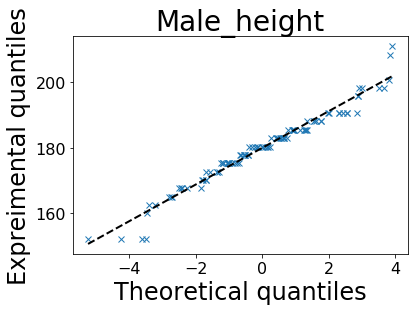

In [61]:
import matplotlib.pyplot as plt
p = np.poly1d(z)
plt.plot(norm_male,Male_female[Male_female.Gender == "male"]['heightInCm'].sort_values().values,'x')
plt.plot(norm_male,p(norm_male),"k--", linewidth=2)
plt.title("Male_height", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

The heights of male sportsperson data is following normal distribution with light tails.

In [29]:
z_female_height = np.polyfit(norm_female,Male_female[Male_female.Gender == "female"]['heightInCm'].sort_values(), 1)

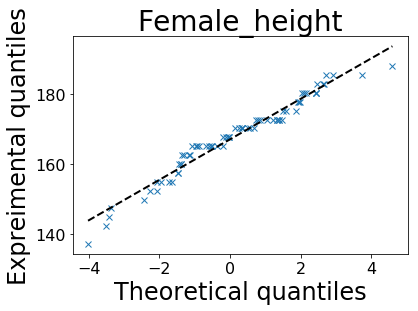

In [62]:
import matplotlib.pyplot as plt
p = np.poly1d(z_female_height)
plt.plot(norm_female,Male_female[Male_female.Gender == "female"]['heightInCm'].sort_values().values,'x')
plt.plot(norm_female,p(norm_female),"k--", linewidth=2)
plt.title("Female_height", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

The heights of female sportsperson data is following normal distribution with light tails.

In [31]:
z_female_weight = np.polyfit(norm_female,Male_female[Male_female.Gender == "female"]['weight'].sort_values(), 1)

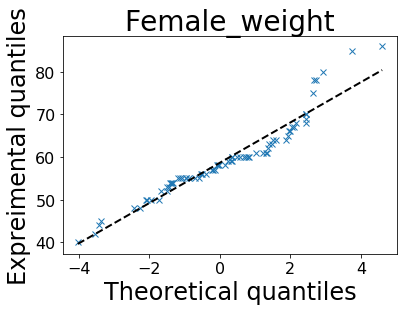

In [63]:
import matplotlib.pyplot as plt
p = np.poly1d(z_female_weight)
plt.plot(norm_female,Male_female[Male_female.Gender == "female"]['weight'].sort_values().values,'x')
plt.plot(norm_female,p(norm_female),"k--", linewidth=2)
plt.title("Female_weight", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

The weights of female sportsperson data is following normal distribution with light right skewness(positive skew).

In [37]:
z_male_weight = np.polyfit(norm_male,Male_female[Male_female.Gender == "male"]['weight'].sort_values(), 1)

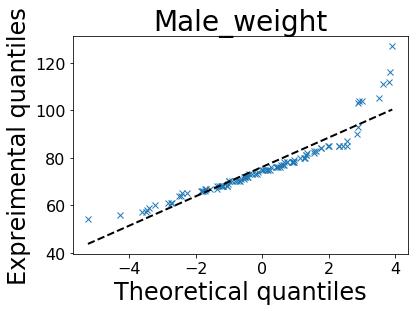

In [64]:
import matplotlib.pyplot as plt
p = np.poly1d(z_male_weight)
plt.plot(norm_male,Male_female[Male_female.Gender == "male"]['weight'].sort_values().values,'x')
plt.plot(norm_male,p(norm_male),"k--", linewidth=2)
plt.title("Male_weight", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

The weights of female sportsperson data is following normal distribution with light right skewness(positive skew).